In [1]:
import os
import random
import numpy as np
import pandas as pd
import tensorflow as tf
from typing import Tuple, List
from cryptovision.tools import (
    image_directory_to_pandas,
    split_image_dataframe,
    tf_dataset_from_pandas,
    predict_image,
    CryptoVisionAI
)

gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

2024-12-16 17:34:09.959 | INFO     | cryptovision.config:<module>:15 - PROJ_ROOT path is: /Users/leonardo/Documents/Projects/cryptovision


In [2]:
IMAGES_DATASET_PATH = '/Users/leonardo/Documents/Projects/cryptovision/data/processed/cv_images_dataset'
TRAINED_MODEL_PATH = '/Users/leonardo/Documents/Projects/cryptovision/models/phorcys_v09_hacpl_rn50v2_v2411251155.keras'

SEED = 42
VAL_SIZE = 0.15
TEST_SIZE = 0.15
BATCH_SIZE = 64

df_images = image_directory_to_pandas(IMAGES_DATASET_PATH)

train_df, val_df, test_df = split_image_dataframe(
    df_images,
    val_size=VAL_SIZE,
    test_size=TEST_SIZE,
    random_state=SEED,
)

test_df.reset_index(drop=True, inplace=True)

family_labels = sorted(df_images['family'].unique())
genus_labels = sorted(df_images['genus'].unique())
species_labels = sorted(df_images['species'].unique())

# Instantiate the class
ai = CryptoVisionAI(
    model_path=TRAINED_MODEL_PATH,
    family_names=family_labels,
    genus_names=genus_labels,
    species_names=species_labels,
)

test_ds, _, _, _ = tf_dataset_from_pandas(test_df, batch_size=BATCH_SIZE, image_size=ai.target_size, shuffle=False)


2024-12-16 17:34:10.319742: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M3 Pro
2024-12-16 17:34:10.319768: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 36.00 GB
2024-12-16 17:34:10.319773: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 13.50 GB
2024-12-16 17:34:10.319787: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-12-16 17:34:10.319796: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)
/Users/leonardo/miniconda3/envs/cvenv/lib/python3.10/site-packages/keras/src/saving/saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has

2024-12-16 17:08:50.898027: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


Correct Species: Eviota albolineata - Index: 5


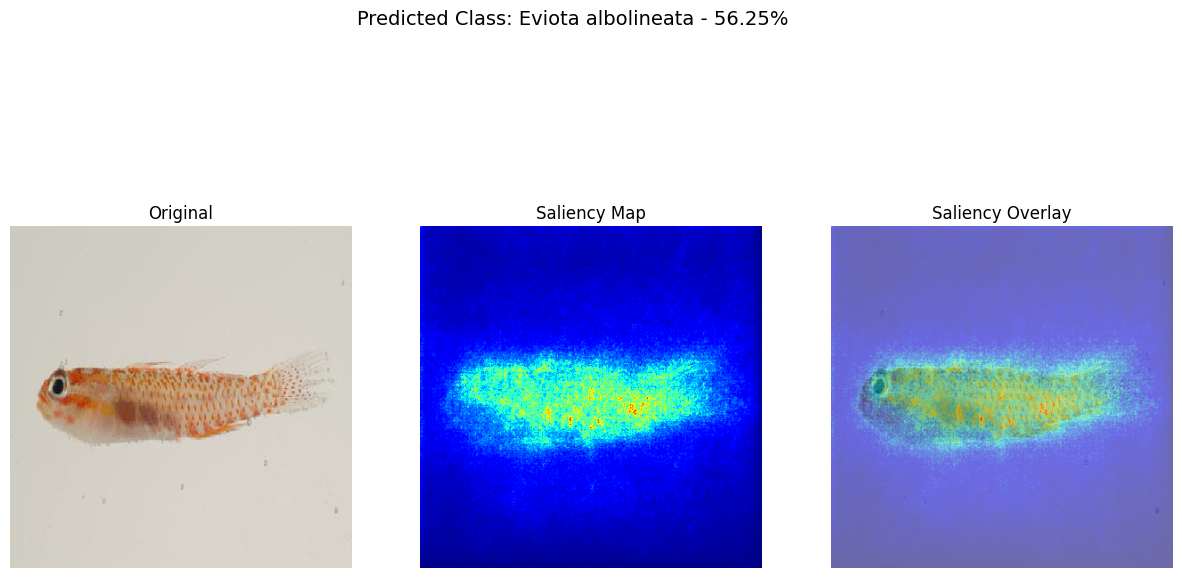

In [3]:
idx = random.randint(0, len(test_df))



ai.saliency_map('species', test_df['image_path'][idx])
print(f"Correct Species: {test_df['species'][idx]} - Index: {idx}") 

# Index with Intersting Mistaskes
# 834 - 853 - 256 - 57 - 512

# Index with Intersting Corrects
# 1084 - 1103 - 176 - 861 - 262 - 67 - 1182 - 968 - 679 (Body Shape)
# 239 - 728 - 1188 - 1143 - 127 - 402 - 114 - 371 - 855 - 253 (expliced body features)
# 692(obj detected) - 916 - 1228 - 774 - 741 (Great) - 952 - 1221 (OBJ Detected) - 543

# He guess
# 904 - 1182 - 127

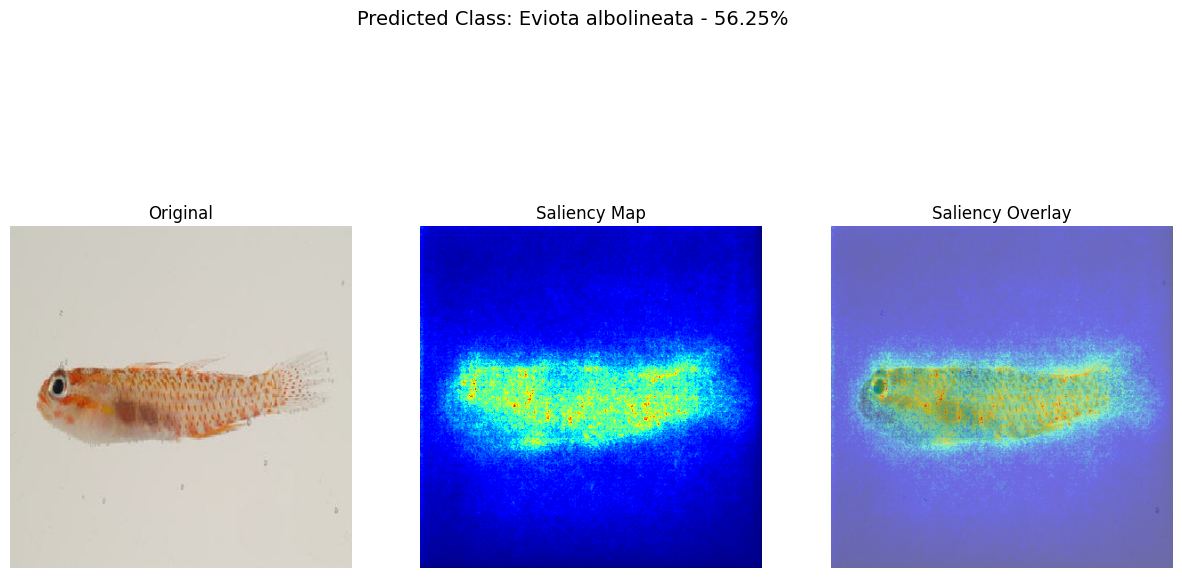

In [4]:
smap = ai.saliency_map('species', test_df['image_path'][idx])

array([[[0.22473644, 0.09703148, 0.12763558, ..., 0.0191254 ,
         0.01857054, 0.01725274],
        [0.2112637 , 0.13060065, 0.12683798, ..., 0.0215876 ,
         0.02455264, 0.00925926],
        [0.14372659, 0.15461574, 0.17148703, ..., 0.02486475,
         0.01926412, 0.01329935],
        ...,
        [0.00768137, 0.00894715, 0.01505063, ..., 0.00230614,
         0.00251422, 0.00022541],
        [0.00683174, 0.0123977 , 0.00969274, ..., 0.00213275,
         0.00143917, 0.00029477],
        [0.00482036, 0.00553128, 0.00832293, ..., 0.00145651,
         0.        , 0.00117908]]], dtype=float32)

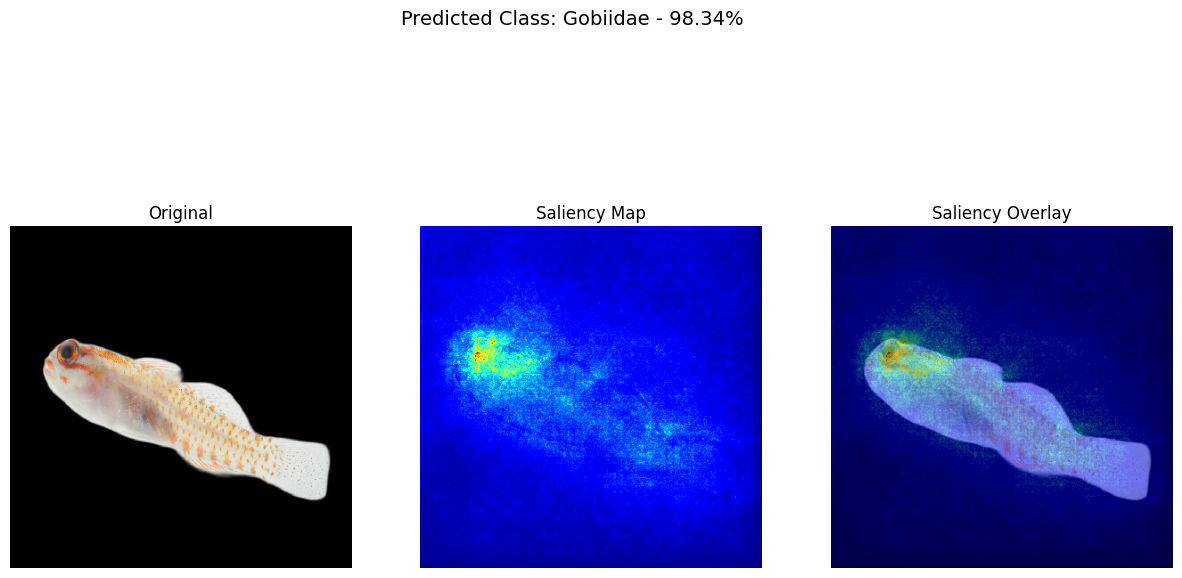

In [34]:
img_path = "/Users/leonardo/Documents/Projects/cryptovision/data/processed/cv_images_dataset/Gobiidae_Eviota_albolineata/sjb_Eviota_albolineata_1.jpeg"

ai.saliency_map('family', img_path, image_show=True)

array([[[0.1704178 , 0.1631681 , 0.1348271 , ..., 0.01557182,
         0.01903223, 0.02077673],
        [0.12742013, 0.12215803, 0.12065661, ..., 0.01674436,
         0.01631538, 0.00972345],
        [0.10768724, 0.09549003, 0.13105212, ..., 0.01838876,
         0.01116767, 0.01610089],
        ...,
        [0.00963766, 0.01285498, 0.01491406, ..., 0.00297423,
         0.00231647, 0.00121543],
        [0.00760717, 0.00842223, 0.00905139, ..., 0.00221638,
         0.00132983, 0.00042898],
        [0.00606286, 0.00444705, 0.0071067 , ..., 0.00092945,
         0.        , 0.00062916]]], dtype=float32)

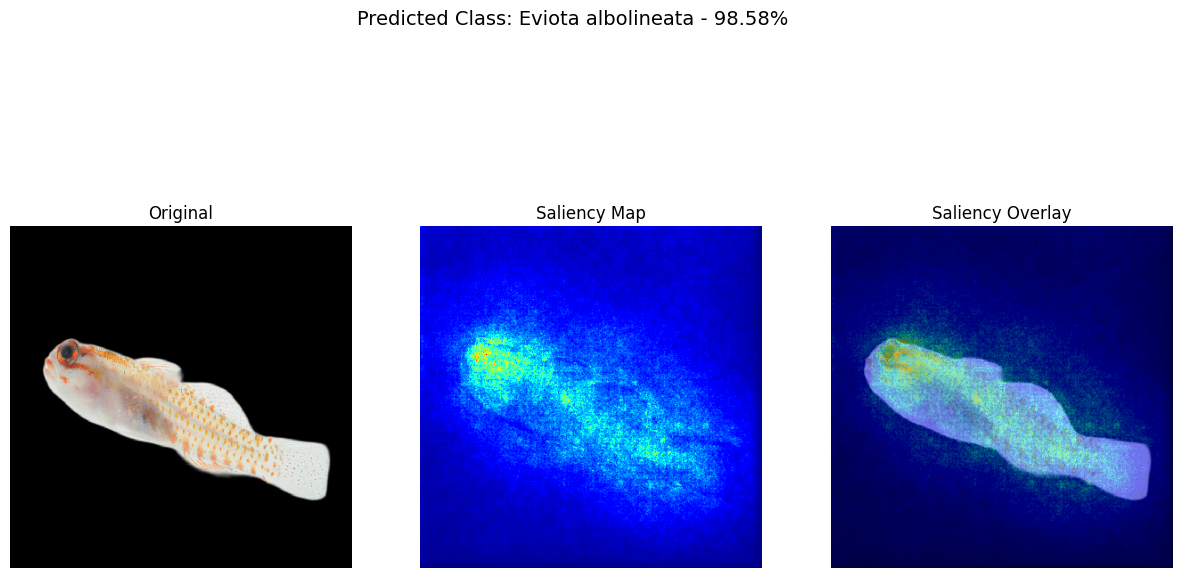

In [35]:
ai.saliency_map('species', img_path, image_show=True)

100%|██████████| 6/6 [00:30<00:00,  5.01s/it]


Saliency maps generation - DONE


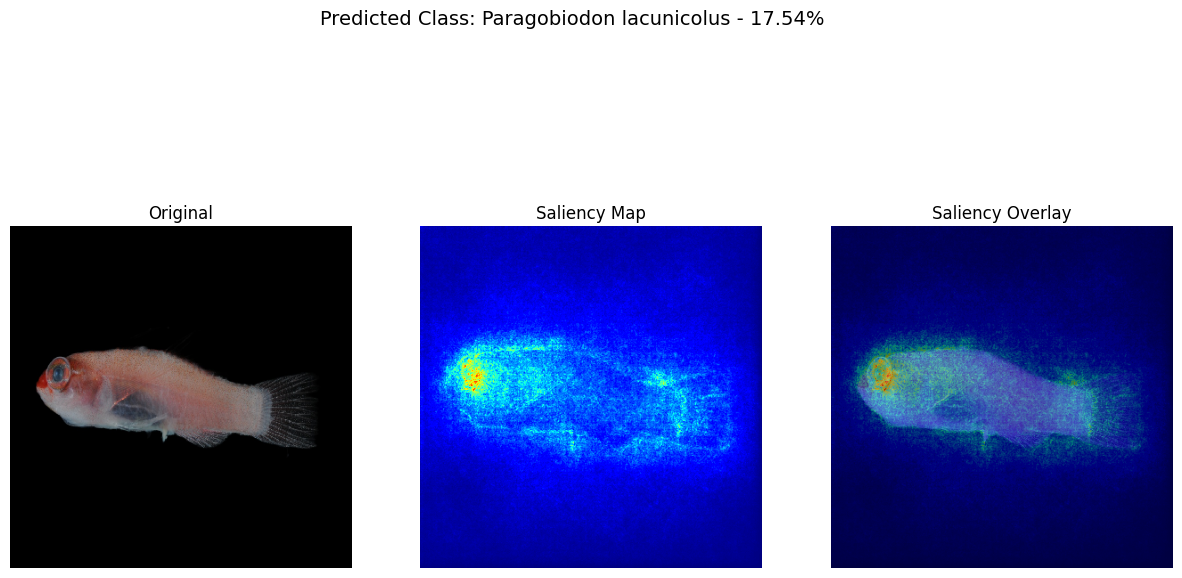

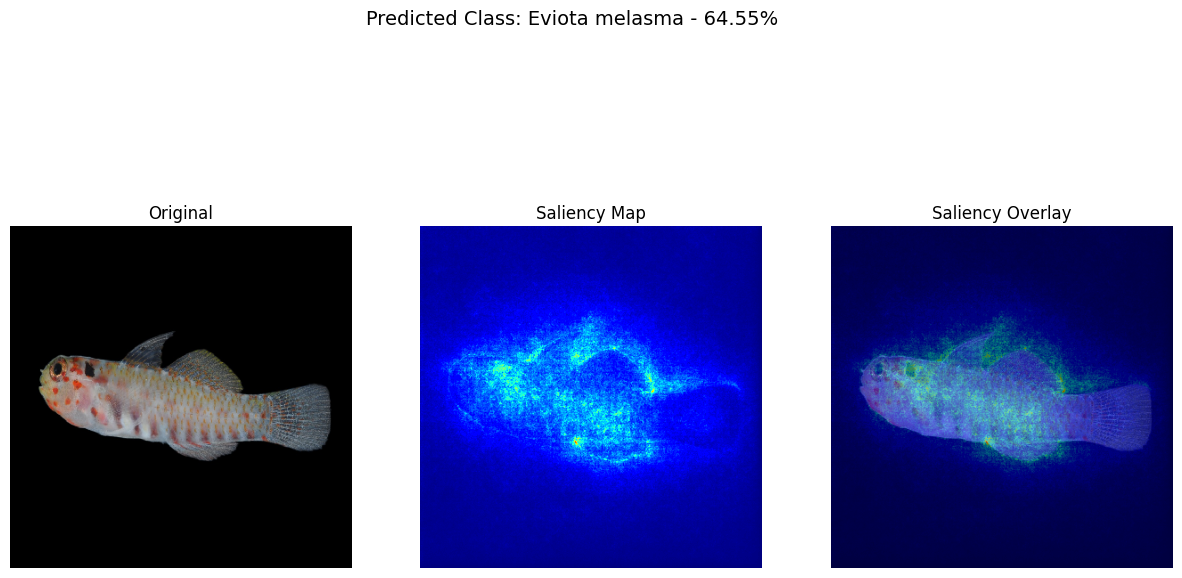

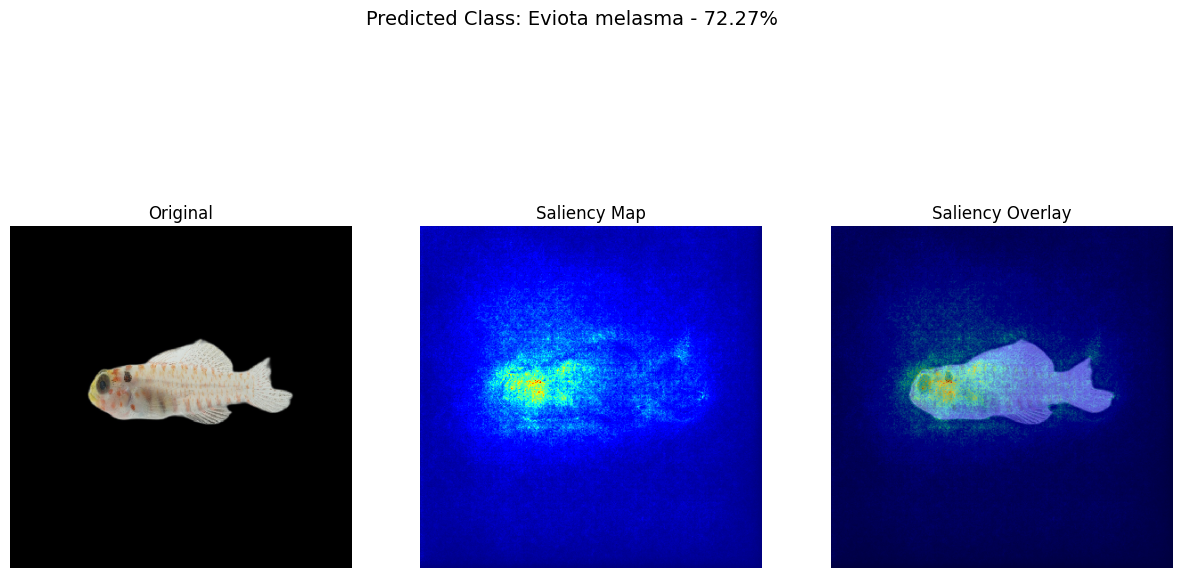

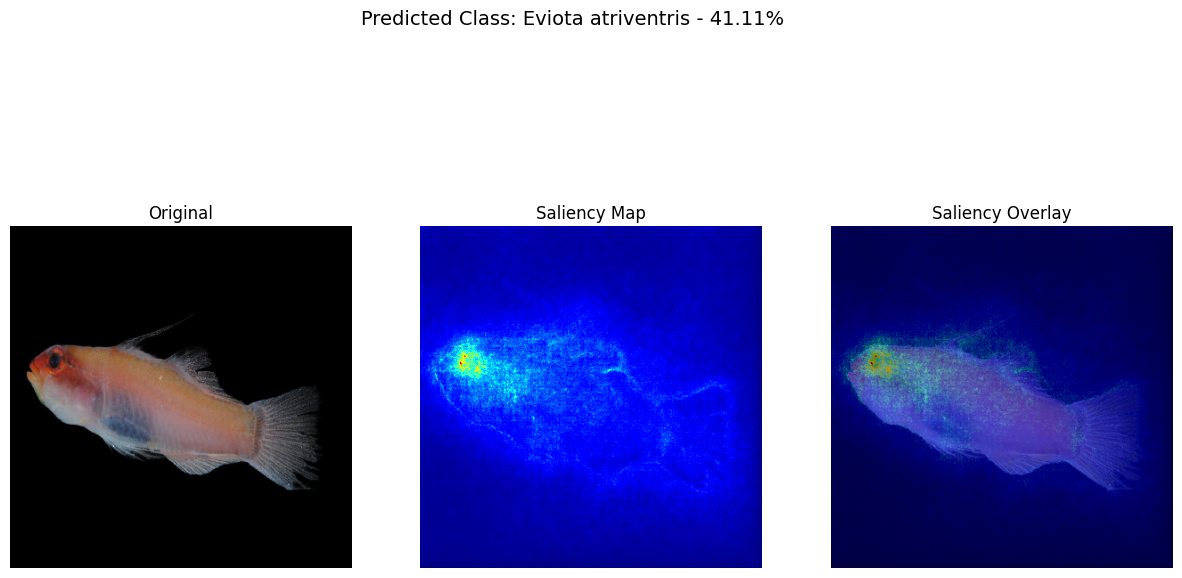

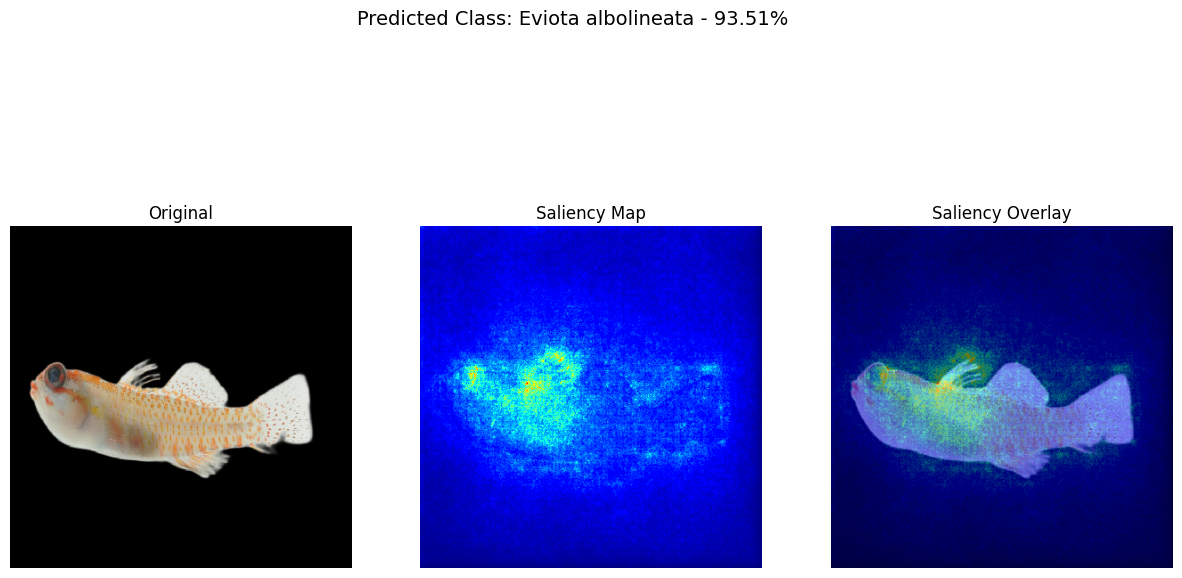

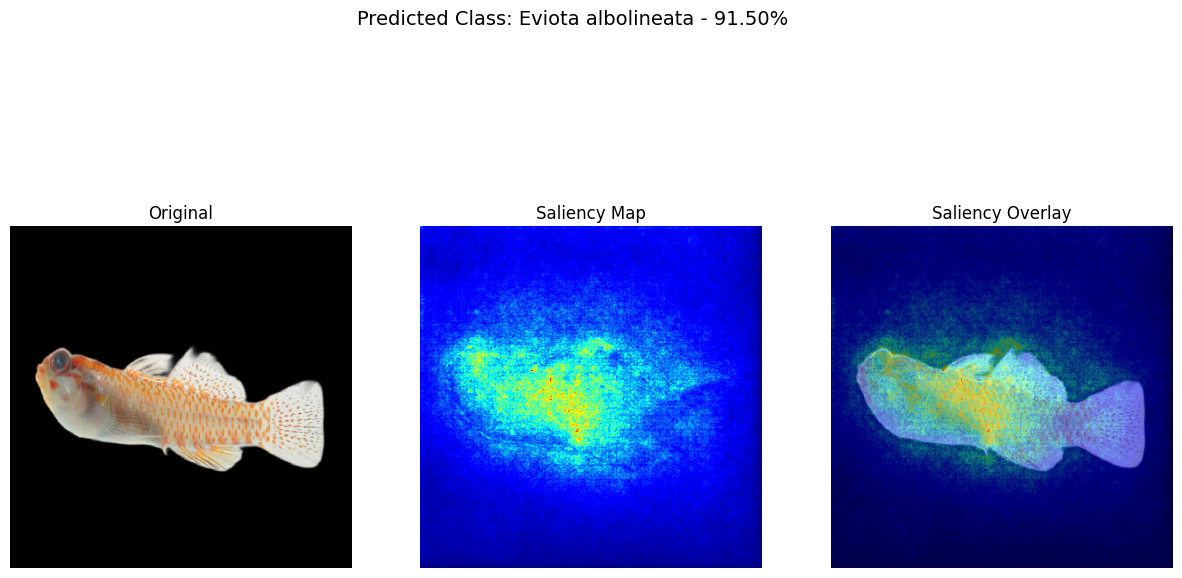

In [25]:
from tqdm import tqdm

maps = []

images_list = {
    '/Users/leonardo/Documents/Projects/cryptovision/data/processed/cv_images_dataset/Gobiidae_Eviota_atriventris/sjb_Eviota_atriventris_1.jpeg',
    '/Users/leonardo/Documents/Projects/cryptovision/data/processed/cv_images_dataset/Gobiidae_Eviota_atriventris/sjb_Eviota_atriventris_3.jpeg',
    '/Users/leonardo/Documents/Projects/cryptovision/data/processed/cv_images_dataset/Gobiidae_Eviota_albolineata/sjb_Eviota_albolineata_9.jpeg',
    '/Users/leonardo/Documents/Projects/cryptovision/data/processed/cv_images_dataset/Gobiidae_Eviota_albolineata/sjb_Eviota_albolineata_16.jpeg',
    '/Users/leonardo/Documents/Projects/cryptovision/data/processed/cv_images_dataset/Gobiidae_Eviota_melasma/sjb_Eviota_melasma_3.jpeg',
    '/Users/leonardo/Documents/Projects/cryptovision/data/processed/cv_images_dataset/Gobiidae_Eviota_melasma/sjb_Eviota_melasma_8.jpeg',
}

for image_path in tqdm(images_list): #tqdm(range(1, 21)):
    maps.append(ai.saliency_map('species', image_path, image_show=True)[0])
    
print("Saliency maps generation - DONE")


In [30]:
import numpy as np
import matplotlib.pyplot as plt
from tf_keras_vis.utils import normalize
from skimage import measure, color
import tensorflow as tf

def preprocess_and_center_image(image, target_size=(224, 224), padding_value=0):
    """
    Preprocesses the image by detecting the bounding box of the object (fish),
    cropping it, resizing, and centering the object.

    Parameters:
    ----------
    image : np.ndarray
        Input image array (H, W, C).
    target_size : tuple, optional
        The desired output size of the image (default is (224, 224)).
    padding_value : int, optional
        The value used to pad the image (default is 0 for black).

    Returns:
    -------
    np.ndarray
        Preprocessed, centered, and resized image.
    """
    # Convert image to grayscale and find the object region
    gray_image = color.rgb2gray(image)
    thresh = gray_image > 0.05  # Threshold to identify the fish
    labeled_image = measure.label(thresh)
    regions = measure.regionprops(labeled_image)

    # Find the largest region (assuming it's the fish)
    if not regions:
        raise ValueError("No object detected in the image.")
    largest_region = max(regions, key=lambda r: r.area)
    minr, minc, maxr, maxc = largest_region.bbox

    # Crop the bounding box
    cropped_image = image[minr:maxr, minc:maxc]

    # Resize and pad the image to center the object
    resized_image = tf.image.resize(cropped_image, target_size, method='bilinear')
    centered_image = tf.image.pad_to_bounding_box(
        resized_image, 0, 0, target_size[0], target_size[1]
    )
    return centered_image.numpy()

def combine_saliency_maps(saliency_maps, method='average', weighted=False, percentile=95):
    """
    Combines multiple saliency maps using the specified method with an optional fine-scale weighting.

    Parameters:
    ----------
    saliency_maps : list of np.ndarray
        List of saliency maps (2D arrays) to combine.
    method : str, optional
        Method to combine the saliency maps. Options are:
        - 'average': Takes the average of the saliency maps.
        - 'max': Takes the maximum value across all saliency maps.
        - 'min': Takes the minimum value across all saliency maps.
    weighted : bool, optional
        Whether to apply weighted aggregation emphasizing key locations across the maps.
    percentile : int, optional
        Percentile threshold to isolate significant pixels (default is 90).

    Returns:
    -------
    np.ndarray
        The combined saliency map.
    """
    if not saliency_maps:
        raise ValueError("The saliency_maps list is empty.")

    # Stack all saliency maps along a new dimension
    stacked_maps = np.stack(saliency_maps, axis=0)

    if weighted:
        # Compute a weight map emphasizing high saliency values based on the percentile threshold
        threshold = np.percentile(stacked_maps, percentile)
        weight_map = np.sum(stacked_maps >= threshold, axis=0)
        weight_map = weight_map / weight_map.max()  # Normalize
        weighted_maps = stacked_maps * weight_map[np.newaxis, :, :]
    else:
        weighted_maps = stacked_maps

    if method == 'average':
        combined_map = np.mean(weighted_maps, axis=0)
    elif method == 'max':
        combined_map = np.max(weighted_maps, axis=0)
    elif method == 'min':
        combined_map = np.min(weighted_maps, axis=0)
    else:
        raise ValueError(f"Invalid method: {method}. Choose 'average', 'max', or 'min'.")

    # Normalize the combined map
    combined_map = normalize(combined_map)

    return combined_map

def plot_combined_saliency(combined_map, original_image, alpha=0.5):
    """
    Plots the combined saliency map alongside the original image.

    Parameters:
    ----------
    combined_map : np.ndarray
        The combined saliency map.
    original_image : np.ndarray
        The original image (H, W, C).
    alpha : float, optional
        The transparency level for the overlay (default is 0.5).
    """
    plt.figure(figsize=(12, 6))

    # Original Image
    plt.subplot(1, 3, 1)
    plt.title("Original Image")
    plt.imshow(original_image)
    plt.axis('off')

    # Combined Saliency Map
    plt.subplot(1, 3, 2)
    plt.title("Combined Saliency Map")
    plt.imshow(combined_map, cmap='jet')
    plt.axis('off')

    # Overlay Saliency Map on Original Image
    plt.subplot(1, 3, 3)
    plt.title("Overlay")
    plt.imshow(original_image)
    plt.imshow(combined_map, cmap='jet', alpha=alpha)
    plt.axis('off')

    plt.tight_layout()
    plt.show()


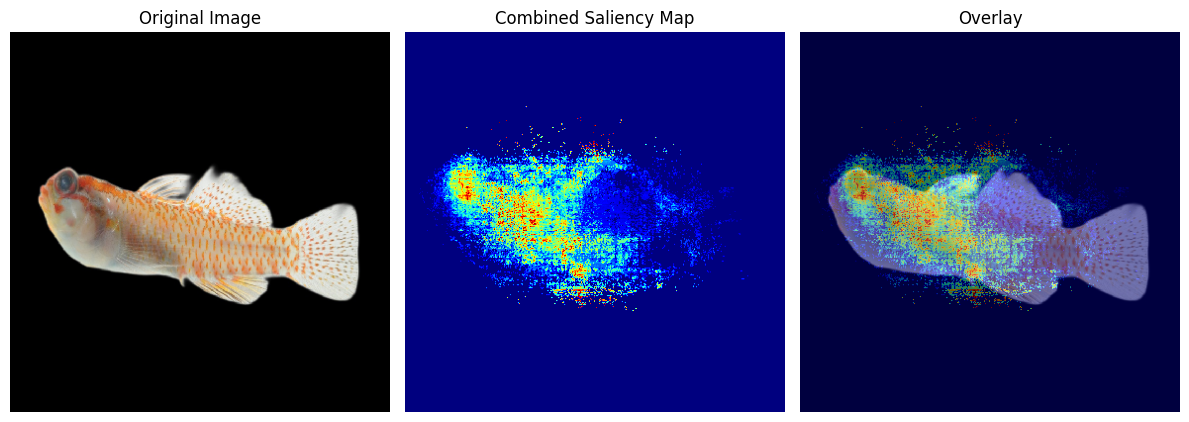

In [31]:
comb_maps = combine_saliency_maps(maps, method='average', weighted=True)

plot_combined_saliency(comb_maps, ai.image)

In [66]:
test_df[test_df['species'] == 'Acanthemblemaria aspera']

image_path  \
26    /Users/leonardo/Documents/Projects/cryptovisio...   
61    /Users/leonardo/Documents/Projects/cryptovisio...   
257   /Users/leonardo/Documents/Projects/cryptovisio...   
295   /Users/leonardo/Documents/Projects/cryptovisio...   
333   /Users/leonardo/Documents/Projects/cryptovisio...   
354   /Users/leonardo/Documents/Projects/cryptovisio...   
545   /Users/leonardo/Documents/Projects/cryptovisio...   
667   /Users/leonardo/Documents/Projects/cryptovisio...   
843   /Users/leonardo/Documents/Projects/cryptovisio...   
1085  /Users/leonardo/Documents/Projects/cryptovisio...   
1092  /Users/leonardo/Documents/Projects/cryptovisio...   
1223  /Users/leonardo/Documents/Projects/cryptovisio...   
1291  /Users/leonardo/Documents/Projects/cryptovisio...   

                              folder_label        family             genus  \
26    Chaenopsidae_Acanthemblemaria_aspera  Chaenopsidae  Acanthemblemaria   
61    Chaenopsidae_Acanthemblemaria_aspera  Chaenopsidae  Acanthemblemaria   
257   Chaenopsidae_Acanthemblemaria_aspera  Chaenopsidae  Acanthemblemaria   
295   Chaenopsidae_Acanthemblemaria_aspera  Chaenopsidae  Acanthemblemaria   
333   Chaenopsidae_Acanthemblemaria_aspera  Chaenopsidae  Acanthemblemaria   
354   Chaenopsidae_Acanthemblemaria_aspera  Chaenopsidae  Acanthemblemaria   
545   Chaenopsidae_Acanthemblemaria_aspera  Chaenopsidae  Acanthemblemaria   
667   Chaenopsidae_Acanthemblemaria_aspera  Chaenopsidae  Acanthemblemaria   
843   Chaenopsidae_Acanthemblemaria_aspera  Chaenopsidae  Acanthemblemaria   
1085  Chaenopsidae_Acanthemblemaria_aspera  Chaenopsidae  Acanthemblemaria   
1092  Chaenopsidae_Acanthemblemaria_aspera  Chaenopsidae  Acanthemblemaria   
1223  Chaenopsidae_Acanthemblemaria_aspera  Chaenopsidae  Acanthemblemaria   
1291  Chaenopsidae_Acanthemblemaria_aspera  Chaenopsidae  Acanthemblemaria   

                      species  
26    Acanthemblemaria aspera  
61    Acanthemblemaria aspera  
257   Acanthemblemaria aspera  
295   Acanthemblemaria aspera  
333   Acanthemblemaria aspera  
354   Acanthemblemaria aspera  
545   Acanthemblemaria aspera  
667   Acanthemblemaria aspera  
843   Acanthemblemaria aspera  
1085  Acanthemblemaria aspera  
1092  Acanthemblemaria aspera  
1223  Acanthemblemaria aspera  
1291  Acanthemblemaria aspera

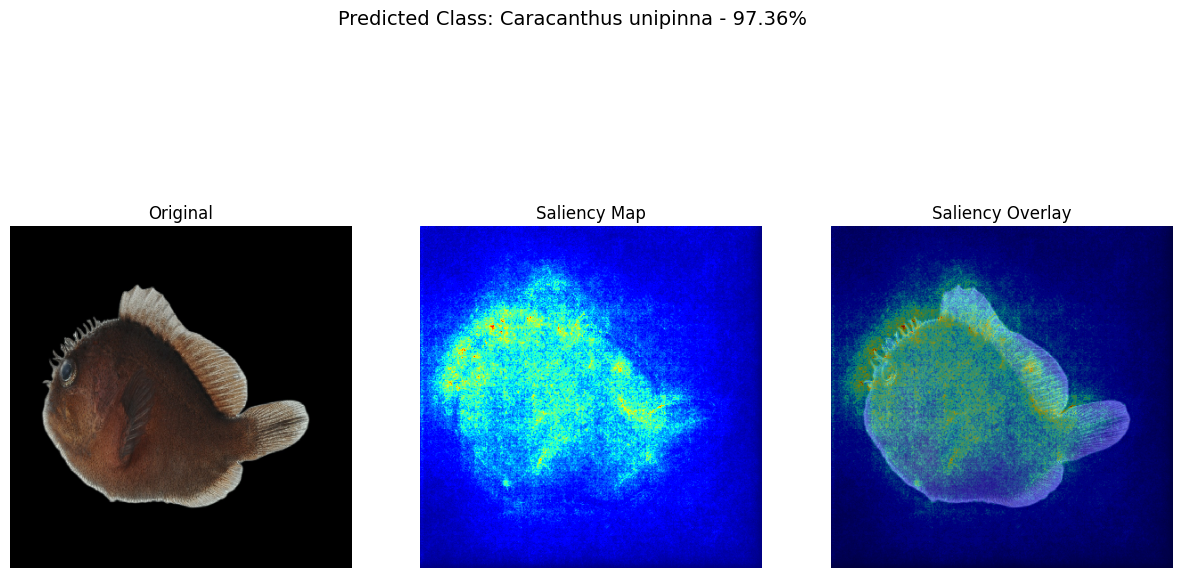

In [30]:
ai.saliency_map('species', test_df['image_path'].values[253]) # 257 - 333 - 1291 - 667 - 843

In [80]:
test_df[test_df['species'] == 'Eviota melasma']

image_path  \
36    /Users/leonardo/Documents/Projects/cryptovisio...   
319   /Users/leonardo/Documents/Projects/cryptovisio...   
384   /Users/leonardo/Documents/Projects/cryptovisio...   
565   /Users/leonardo/Documents/Projects/cryptovisio...   
646   /Users/leonardo/Documents/Projects/cryptovisio...   
688   /Users/leonardo/Documents/Projects/cryptovisio...   
691   /Users/leonardo/Documents/Projects/cryptovisio...   
733   /Users/leonardo/Documents/Projects/cryptovisio...   
800   /Users/leonardo/Documents/Projects/cryptovisio...   
926   /Users/leonardo/Documents/Projects/cryptovisio...   
1141  /Users/leonardo/Documents/Projects/cryptovisio...   
1259  /Users/leonardo/Documents/Projects/cryptovisio...   
1336  /Users/leonardo/Documents/Projects/cryptovisio...   
1339  /Users/leonardo/Documents/Projects/cryptovisio...   
1351  /Users/leonardo/Documents/Projects/cryptovisio...   

                 folder_label    family   genus         species  
36    Gobiidae_Eviota_melasma  Gobiidae  Eviota  Eviota melasma  
319   Gobiidae_Eviota_melasma  Gobiidae  Eviota  Eviota melasma  
384   Gobiidae_Eviota_melasma  Gobiidae  Eviota  Eviota melasma  
565   Gobiidae_Eviota_melasma  Gobiidae  Eviota  Eviota melasma  
646   Gobiidae_Eviota_melasma  Gobiidae  Eviota  Eviota melasma  
688   Gobiidae_Eviota_melasma  Gobiidae  Eviota  Eviota melasma  
691   Gobiidae_Eviota_melasma  Gobiidae  Eviota  Eviota melasma  
733   Gobiidae_Eviota_melasma  Gobiidae  Eviota  Eviota melasma  
800   Gobiidae_Eviota_melasma  Gobiidae  Eviota  Eviota melasma  
926   Gobiidae_Eviota_melasma  Gobiidae  Eviota  Eviota melasma  
1141  Gobiidae_Eviota_melasma  Gobiidae  Eviota  Eviota melasma  
1259  Gobiidae_Eviota_melasma  Gobiidae  Eviota  Eviota melasma  
1336  Gobiidae_Eviota_melasma  Gobiidae  Eviota  Eviota melasma  
1339  Gobiidae_Eviota_melasma  Gobiidae  Eviota  Eviota melasma  
1351  Gobiidae_Eviota_melasma  Gobiidae  Eviota  Eviota melasma

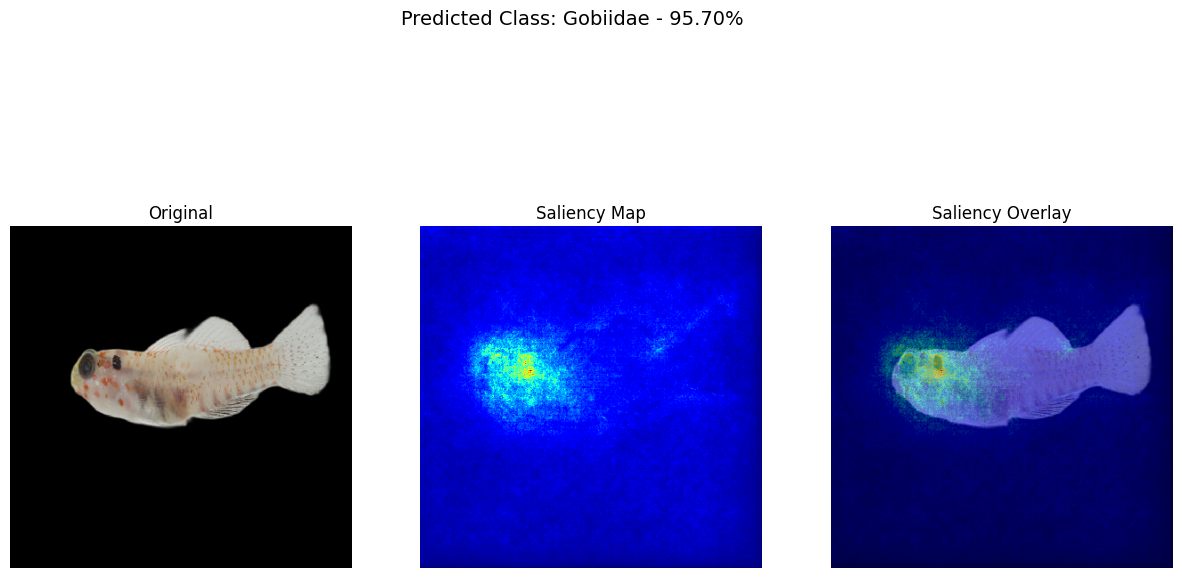

In [26]:
ai.saliency_map('family', test_df['image_path'].values[926])

# No detection 
# 800

# Body Feature
# 1259 - 1336 - 926

In [4]:
import numpy as np
from lime import lime_image
from skimage.segmentation import mark_boundaries
import matplotlib.pyplot as plt

class CryptoVisionAIWithLIME(CryptoVisionAI):
    def __init__(self, *args, **kwargs):
        super().__init__(*args, **kwargs)
        self.lime_explainer = lime_image.LimeImageExplainer()
    
    def lime_predict(self, images):
        """
        Wrapper function for LIME to predict class probabilities.
        
        Parameters:
            images (np.array): Batch of images to predict.
            
        Returns:
            np.array: Predicted probabilities for each class.
        """
        preds = self.model.predict(images, verbose=0)
        # Assuming we're explaining the species level (preds[2])
        return preds[2]
    
    def explain_with_lime(self, image_path, top_labels=5, hide_color=None, num_samples=1000):
        """
        Generates LIME explanation for a single image.
        
        Parameters:
            image_path (str): Path to the image to explain.
            top_labels (int): Number of top labels to consider.
            hide_color (tuple or None): Color to hide superpixels.
            num_samples (int): Number of samples to generate for LIME.
        
        Returns:
            dict: Explanation containing the image and overlay.
        """
        self.image_path = image_path
        img = np.squeeze(self.image_array, axis=0)  # Remove batch dimension

        explanation = self.lime_explainer.explain_instance(
            img,  # Image to explain
            self.lime_predict,  # Function to predict probabilities
            top_labels=top_labels,
            hide_color=hide_color,
            num_samples=num_samples
        )

        return explanation
    
    def plot_lime_explanation(self, explanation, image_path, label, figure_size=(15, 8)):
        """
        Plots the LIME explanation for a single label.
        
        Parameters:
            explanation (Explanation): LIME explanation object.
            image_path (str): Path to the original image.
            label (int): Label to visualize the explanation for.
            figure_size (tuple): Size of the matplotlib figure.
        """
        self.image_path = image_path
        img = np.squeeze(self.image_array, axis=0)  # Remove batch dimension

        # Get LIME mask
        temp, mask = explanation.get_image_and_mask(
            label,
            positive_only=True,
            num_features=10,
            hide_rest=False
        )

        # Plot the results
        plt.figure(figsize=figure_size)
        
        # Original image
        plt.subplot(1, 3, 1)
        plt.title("Original Image")
        plt.imshow(img.astype('uint8'))
        plt.axis('off')

        # LIME explanation
        plt.subplot(1, 3, 2)
        plt.title("LIME Explanation")
        plt.imshow(mark_boundaries(temp, mask))
        plt.axis('off')
        
        # Original image with LIME explanation
        plt.subplot(1, 3, 3)
        plt.title("Original Image with LIME Explanation")
        plt.imshow(img.astype('uint8'))
        plt.imshow(mark_boundaries(temp, mask), cmap='jet', alpha=0.5)
        plt.axis('off')

        plt.tight_layout()
        plt.show()

In [5]:
# Import the extended class
from lime import lime_image
from skimage.segmentation import mark_boundaries

# Instantiate the CryptoVisionAIWithLIME class
ai_with_lime = CryptoVisionAIWithLIME(
    model_path=TRAINED_MODEL_PATH,
    family_names=family_labels,
    genus_names=genus_labels,
    species_names=species_labels
)


/Users/leonardo/miniconda3/envs/cvenv/lib/python3.10/site-packages/keras/src/saving/saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 98 variables whereas the saved optimizer has 102 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [37]:
image_path = test_df.iloc[741]['image_path']  # Path to an image
explanation = ai_with_lime.explain_with_lime(image_path, top_labels=3, num_samples=1000)


  0%|          | 0/1000 [00:00<?, ?it/s]

In [38]:
# Check top labels in the explanation
print("Top labels (indices):", explanation.top_labels)

# Map indices to class names
for label_idx in explanation.top_labels:
    print(f"Class Index: {label_idx}, Class Name: {species_labels[label_idx]}")

Top labels (indices): [37, 13, 46]
Class Index: 37, Class Name: Nemateleotris magnifica
Class Index: 13, Class Name: Cypho purpurascens
Class Index: 46, Class Name: Pomacentrus amboinensis


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


{'family': {'name': 'Gobiidae', 'label': 6, 'prob': 0.9863}, 'genus': {'name': 'Nemateleotris', 'label': 28, 'prob': 0.999}, 'species': {'name': 'Nemateleotris magnifica', 'label': 37, 'prob': 0.9976}}


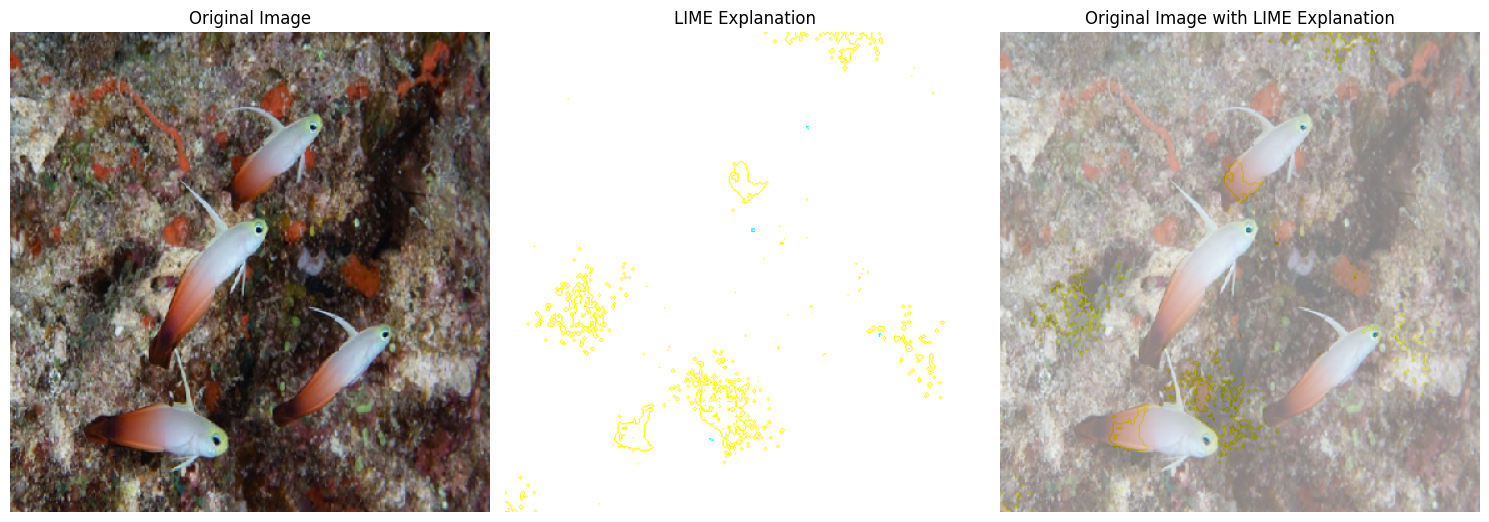

In [39]:
# Visualize the explanation for a specific label (e.g., species class 0)
print(ai.predict_from_path(image_path, 'complete'))
ai_with_lime.plot_lime_explanation(explanation, image_path, label=explanation.top_labels[0])

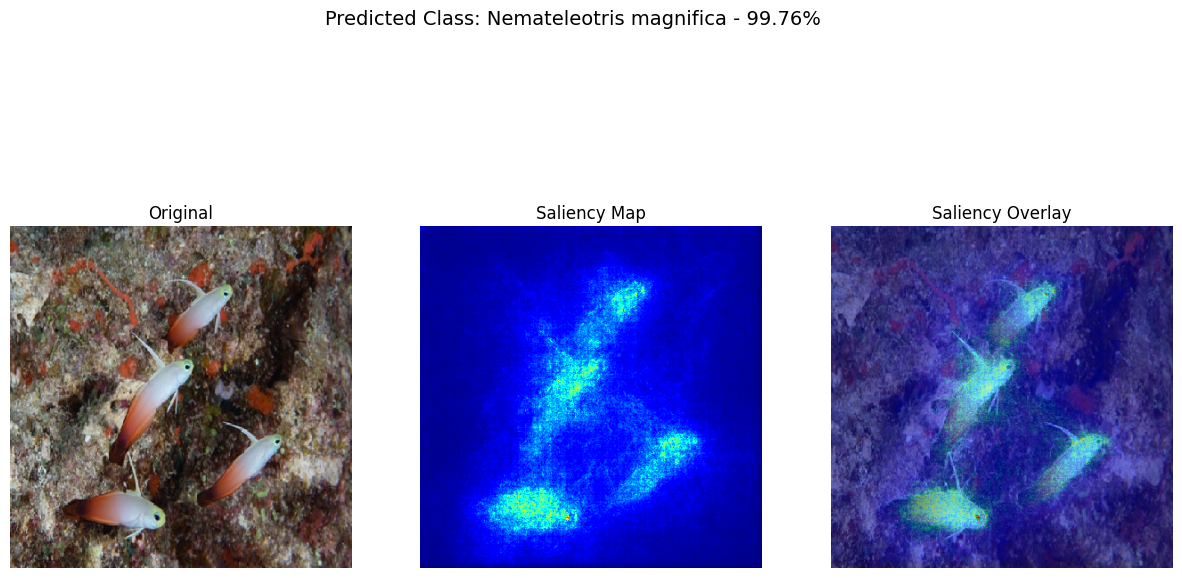

In [40]:
ai.saliency_map('species', image_path)